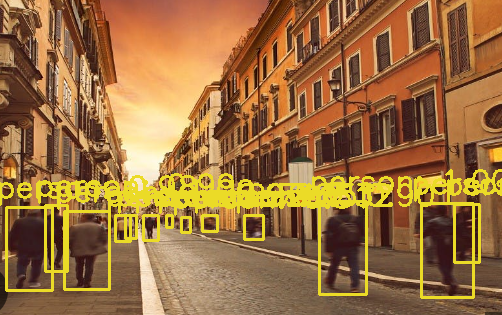

-1

In [1]:
import os.path
import cv2 # opencv import
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# Download YOLO net config file
# We'll it from the YOLO author's github repo
yolo_config = 'yolov3-spp.cfg'
if not os.path.isfile(yolo_config):
    url ='https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
    r = requests.get(url)
    with open(yolo_config, 'wb') as f:
        f.write(r.content)
# Download YOLO net weights
# We'll it from the YOLO author's website
yolo_weights = 'yolov3-spp.weights'
if not os.path.isfile(yolo_weights):
    url = 'https://pjreddie.com/media/files/yolov3.weights'
    r = requests.get(url)
    with open(yolo_weights, 'wb') as f:
        f.write(r.content)
# Download class names file
# Contains the names of the classes the network can detect
classes_file = 'coco.names'
if not os.path.isfile(classes_file):
    url ='https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)
# load class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
# Download object detection image
image_file = 'img.png' 
# read and normalize image
image = cv2.imread(image_file) 
blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0, 0, 0),True, crop=False)
# Load the network
net = cv2.dnn.readNet(yolo_weights, yolo_config)
# set as input to the net
net.setInput(blob)
# get network output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]



# inference
# the network outputs multiple lists of anchor boxes,
# one for each detected class
outs = net.forward(output_layers)
# extract bounding boxes
class_ids = list()
confidences = list()
boxes = list()
# iterate over all classes
for out in outs:
    # iterate over the anchor boxes for each class
    for detection in out:
      # bounding box
      center_x = int(detection[0] * image.shape[1])
      center_y = int(detection[1] * image.shape[0])
      w = int(detection[2] * image.shape[1])
      h = int(detection[3] * image.shape[0])
      x = center_x - w // 2
      y = center_y - h // 2
      boxes.append([x, y, w, h])
      # class
      class_id = np.argmax(detection[5:])
      class_ids.append(class_id)
      # confidence
      confidence = detection[4]
      confidences.append(float(confidence))
# non-max suppression
ids = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.3,
nms_threshold=0.5)
# draw the bounding boxes on the image
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in ids:
    #i = i[0]
    x, y, w, h = boxes[i]
    class_id = class_ids[i]
    color = colors[class_id]
    cv2.rectangle(image, (round(x), round(y)), (round(x + w), round(y + h)), color, 2)
    label = "%s: %.2f" % (classes[class_id], confidences[i])
    cv2.putText(image, label, (x - 10, y - 10),
cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
cv2_imshow(image) # google colab: utiliser cv2.imread('Object detection, cv2_imshow(image))
cv2.waitKey()

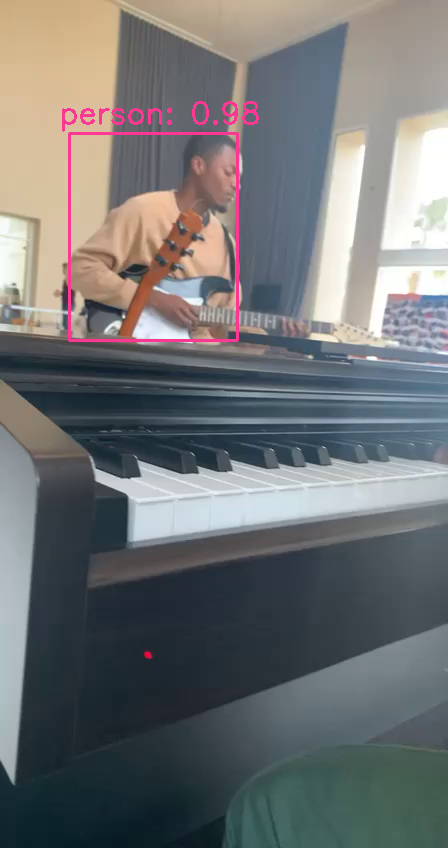

-1

In [2]:
import os.path
import cv2 # opencv import
import numpy as np
import requests
from google.colab.patches import cv2_imshow
# Download YOLO net config file
# We'll it from the YOLO author's github repo
yolo_config = 'yolov3-spp.cfg'
if not os.path.isfile(yolo_config):
    url ='https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
    r = requests.get(url)
    with open(yolo_config, 'wb') as f:
        f.write(r.content)
# Download YOLO net weights
# We'll it from the YOLO author's website
yolo_weights = 'yolov3-spp.weights'
if not os.path.isfile(yolo_weights):
    url = 'https://pjreddie.com/media/files/yolov3.weights'
    r = requests.get(url)
    with open(yolo_weights, 'wb') as f:
        f.write(r.content)
# Download class names file
# Contains the names of the classes the network can detect
classes_file = 'coco.names'
if not os.path.isfile(classes_file):
    url ='https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)
# load class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
# Download object detection image
#image_file = '2.jpeg'
image_file = 'piano.mp4'
# read and normalize image
s, image = cv2.VideoCapture(image_file).read()
blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0, 0, 0),True, crop=False)
# Load the network
net = cv2.dnn.readNet(yolo_weights, yolo_config)
# set as input to the net
net.setInput(blob)
# get network output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


# inference
# the network outputs multiple lists of anchor boxes,
# one for each detected class
outs = net.forward(output_layers)
# extract bounding boxes
class_ids = list()
confidences = list()
boxes = list()
# iterate over all classes
for out in outs:
    # iterate over the anchor boxes for each class
    for detection in out:
      # bounding box
      center_x = int(detection[0] * image.shape[1])
      center_y = int(detection[1] * image.shape[0])
      w = int(detection[2] * image.shape[1])
      h = int(detection[3] * image.shape[0])
      x = center_x - w // 2
      y = center_y - h // 2
      boxes.append([x, y, w, h])
      # class
      class_id = np.argmax(detection[5:])
      class_ids.append(class_id)
      # confidence
      confidence = detection[4]
      confidences.append(float(confidence))
# non-max suppression
ids = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.3,
nms_threshold=0.5)
# draw the bounding boxes on the image
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in ids:
    #i = i[0]
    x, y, w, h = boxes[i]
    class_id = class_ids[i]
    color = colors[class_id]
    cv2.rectangle(image, (round(x), round(y)), (round(x + w), round(y + h)), color, 2)
    label = "%s: %.2f" % (classes[class_id], confidences[i])
    cv2.putText(image, label, (x - 10, y - 10),
cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
cv2_imshow(image) # google colab: utiliser cv2.imread('Object detection, cv2_imshow(image))
cv2.waitKey()

In [4]:
# Importing needed libraries
import numpy as np
import cv2

# initialize minimum probability to eliminate weak predictions
p_min = 0.5

# threshold when applying non-maxia suppression
thres = 0.

# 'VideoCapture' object and reading video from a file
video = cv2.VideoCapture('piano.mp4')

# Preparing variable for writer
# that we will use to write processed frames
writer = None

# Preparing variables for spatial dimensions of the frames
h, w = None, None

# Create labels into list
classes_file = 'coco.names'
if not os.path.isfile(classes_file):
    url ='https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)
# load class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f]
# Initialize colours for representing every detected object
colours = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Loading trained YOLO v3 Objects Detector
# with the help of 'dnn' library from OpenCV
# Reads a network model stored in Darknet model files.
network = cv2.dnn.readNetFromDarknet('yolov3-spp.cfg',
                                     'yolov3-spp.weights')

# Getting only output layer names that we need from YOLO
ln = network.getLayerNames()
ln = [ln[i - 1] for i in network.getUnconnectedOutLayers()]

# Defining loop for catching frames
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Getting dimensions of the frame for once as everytime dimensions will be same
    if w is None or h is None:
        # Slicing and get height, width of the image
        h, w = frame.shape[:2]

    # frame preprocessing for deep learning
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
                                 swapRB=True, crop=False)

    # perform a forward pass of the YOLO object detector, giving us our bounding boxes
    # and associated probabilities.
    network.setInput(blob)
    output_from_network = network.forward(ln)

    # Preparing lists for detected bounding boxes, confidences and class numbers.
    bounding_boxes = []
    confidences = []
    class_numbers = []

    # Going through all output layers after feed forward pass
    for result in output_from_network:
        for detected_objects in result:
            scores = detected_objects[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]

            if confidence_current > p_min:
                box_current = detected_objects[0:4] * np.array([w, h, w, h])

                # Now, from YOLO data format, we can get top left corner coordinates
                # that are x_min and y_min
                x_center, y_center, box_width, box_height = box_current
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))

                # Adding results into prepared lists
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    # Implementing non-maximum suppression of given bounding boxes
    # With this technique we exclude some of bounding boxes if their
    # corresponding confidences are low or there is another
    # bounding box for this region with higher confidence
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences,
                               p_min, thres)

    # At-least one detection should exists
    if len(results) > 0:
        for i in results.flatten():
            # Getting current bounding box coordinates, its width and height
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

            # Preparing colour for current bounding box
            colour_box_current = colours[class_numbers[i]].tolist()

            # Drawing bounding box on the original image
            cv2.rectangle(frame, (x_min, y_min),
                          (x_min + box_width, y_min + box_height),
                          colour_box_current, 2)

            # Preparing text with label and confidence for current bounding box
            text_box_current = '{}: {:.4f}'.format(classes[int(class_numbers[i])],
                                                   confidences[i])

            # Putting text with label and confidence on the original image
            cv2.putText(frame, text_box_current, (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_COMPLEX, 0.7, colour_box_current, 2)

    """Store proccessed frames into result video."""
    # Initialize writer
    if writer is None:
        resultVideo = cv2.VideoWriter_fourcc(*'mp4v')

        # Writing current processed frame into the video file
        writer = cv2.VideoWriter('result-video.mp4', resultVideo, 30,
                                 (frame.shape[1], frame.shape[0]), True)

    # Write processed current frame to the file
    writer.write(frame)

# Releasing video reader and writer
video.release()
writer.release()